In [2]:
%pip install neattext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.naive_bayes as nb


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
np.random.seed(0)
X = np.random.rand(20,1) * 10
y = 2* X +1 + np.random.randn(20,1)*2
print(X)
print(y)

[[5.48813504]
 [7.15189366]
 [6.02763376]
 [5.44883183]
 [4.23654799]
 [6.45894113]
 [4.37587211]
 [8.91773001]
 [9.63662761]
 [3.83441519]
 [7.91725038]
 [5.2889492 ]
 [5.68044561]
 [9.25596638]
 [0.71036058]
 [0.871293  ]
 [0.20218397]
 [8.32619846]
 [7.78156751]
 [8.70012148]]
[[14.96442822]
 [14.8934708 ]
 [13.68140292]
 [10.18947218]
 [ 4.36711636]
 [15.22511945]
 [11.48061662]
 [17.35112997]
 [24.81276446]
 [ 5.76009903]
 [16.9260178 ]
 [11.2035307 ]
 [15.42644965]
 [22.45065031]
 [ 2.73061602]
 [ 3.49891103]
 [-0.37120355]
 [13.69080397]
 [15.86731072]
 [18.7129409 ]]


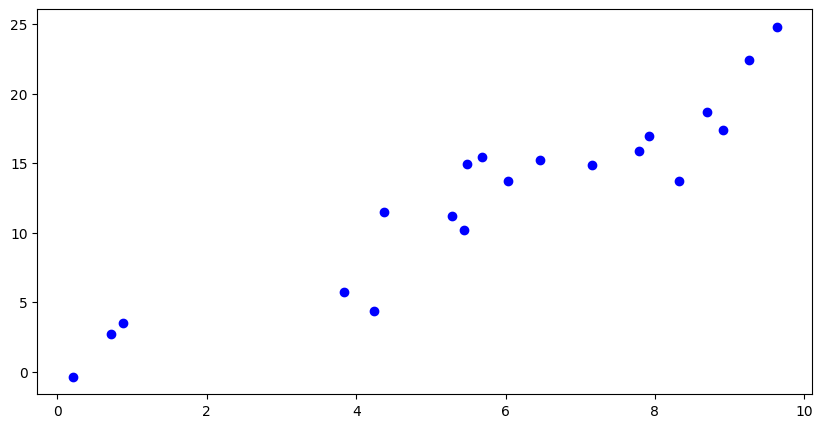

In [4]:
plt.figure(figsize = (10,5))
plt.scatter(X,y, color = 'blue', label = 'DataFrame')

In [5]:
#importing given dataset
df = pd.read_csv('Documents.csv')

In [6]:
df.head()


,id,user_id,document_name,description,pdf_name,pdf_path,status,latitude,longitude,created_at,updated_at,color_id,color_status,is_fake,state,county,attachment_permission
0,7,290,Misc.Red Flags,ES&S machines in poll manager training room,.png,/pdf/.png,1,NaN,NaN,5/18/2022 13:57,11/6/2023 12:49,3.0,1,0,NaN,NaN,1
1,10,342,Mail in Ballot Issues,Why is a person registered to vote at the Noko...,.png,/pdf/.png,1,NaN,NaN,5/28/2022 2:29,8/30/2023 13:53,2.0,1,0,NaN,NaN,1
2,11,448,Misc. Red Flags,Found a bus broke down with ballot printers. T...,Fri Jun 03 16_16_43 MST 2022.jpg,/pdf/Fri Jun 03 16_16_43 MST 2022.jpg,1,NaN,NaN,6/3/2022 23:17,8/30/2023 13:52,3.0,1,0,NaN,NaN,1
3,12,486,Help/Support,How do I see other candidates beside Finchem?,.png,/pdf/.png,1,NaN,NaN,6/4/2022 20:50,6/4/2022 20:50,NaN,0,0,NaN,NaN,1
4,13,497,Misc. Red Flags,early voting again without requesting it. no i...,1654390984885.jpg,/pdf/1654390984885.jpg,1,NaN,NaN,6/5/2022 1:03,8/30/2023 13:52,2.0,1,0,NaN,NaN,1


In [7]:
df['color_id'].value_counts()

3.0    441
2.0    248
4.0    217
5.0     95
6.0      6
Name: color_id, dtype: int64

<Axes: xlabel='color_id', ylabel='count'>

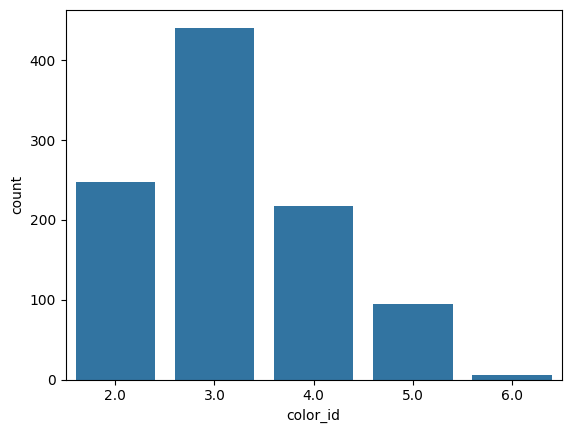

In [8]:
sns.countplot(x='color_id',data=df)

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

#### for removing the user handle like @ ! any punctuation mark

In [10]:
df['clean_text']=df['description'].apply(nfx.remove_userhandles)

In [11]:
df['clean_text']=df['description'].apply(nfx.remove_stopwords)

In [12]:
df

,id,user_id,document_name,description,pdf_name,pdf_path,status,latitude,longitude,created_at,updated_at,color_id,color_status,is_fake,state,county,attachment_permission,clean_text
0,7,290,Misc.Red Flags,ES&S machines in poll manager training room,.png,/pdf/.png,1,NaN,NaN,5/18/2022 13:57,11/6/2023 12:49,3.0,1,0,NaN,NaN,1,ES&S machines poll manager training room
1,10,342,Mail in Ballot Issues,Why is a person registered to vote at the Noko...,.png,/pdf/.png,1,NaN,NaN,5/28/2022 2:29,8/30/2023 13:53,2.0,1,0,NaN,NaN,1,person registered vote Nokomis Beach Park Bath...
2,11,448,Misc. Red Flags,Found a bus broke down with ballot printers. T...,Fri Jun 03 16_16_43 MST 2022.jpg,/pdf/Fri Jun 03 16_16_43 MST 2022.jpg,1,NaN,NaN,6/3/2022 23:17,8/30/2023 13:52,3.0,1,0,NaN,NaN,1,Found bus broke ballot printers. Election Syst...
3,12,486,Help/Support,How do I see other candidates beside Finchem?,.png,/pdf/.png,1,NaN,NaN,6/4/2022 20:50,6/4/2022 20:50,NaN,0,0,NaN,NaN,1,candidates Finchem?
4,13,497,Misc. Red Flags,early voting again without requesting it. no i...,1654390984885.jpg,/pdf/1654390984885.jpg,1,NaN,NaN,6/5/2022 1:03,8/30/2023 13:52,2.0,1,0,NaN,NaN,1,early voting requesting it. information pollin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1539,10232,Polling Location Issues,Early voting for 2024 Primary. Tucker Reid Lib...,NaN,NaN,1,33.857517,-84.210216,4/29/2024 16:11,4/29/2024 18:42,3.0,1,0,Georgia,DeKalb,1,Early voting 2024 Primary. Tucker Reid Library...
1037,1541,4703,Polling Location Issues,workers could not find me in the electronic po...,NaN,NaN,1,42.892223,-78.837708,4/30/2024 15:58,4/30/2024 16:04,4.0,1,0,New York,Erie,1,workers find electronic poll book (new erie co...
1038,1542,14257,Polling Location Issues,PC was sitting on table for reviewing the samp...,NaN,NaN,1,34.064623,-84.209607,5/8/2024 22:50,5/9/2024 14:58,2.0,1,0,Georgia,Fulton,1,PC sitting table reviewing sample ballot. Aske...
1039,1543,14725,Miscellaneous,"I just sent in my absentee ballot, how do I tr...",NaN,NaN,1,37.377094,-77.504986,5/14/2024 23:30,5/15/2024 4:08,2.0,1,0,Virginia,Chesterfield,1,"sent absentee ballot, track it, know counted? ..."


In [13]:
df['color_id'] = df['color_id'].fillna(0).astype(int)

In [14]:
x_features = df['clean_text']
y_labels = df['color_id']

In [15]:
print(x_features)
print(y_labels)

0                ES&S machines poll manager training room
1       person registered vote Nokomis Beach Park Bath...
2       Found bus broke ballot printers. Election Syst...
3                                     candidates Finchem?
4       early voting requesting it. information pollin...
                              ...                        
1036    Early voting 2024 Primary. Tucker Reid Library...
1037    workers find electronic poll book (new erie co...
1038    PC sitting table reviewing sample ballot. Aske...
1039    sent absentee ballot, track it, know counted? ...
1040    Dem / OWO / CCP / cartel funded, INVASION coun...
Name: clean_text, Length: 1041, dtype: object
0       3
1       2
2       3
3       0
4       2
       ..
1036    3
1037    4
1038    2
1039    2
1040    6
Name: color_id, Length: 1041, dtype: int64


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_labels,test_size=0.3,random_state=42)

In [17]:
from sklearn.pipeline import Pipeline


In [18]:
pip_lr = Pipeline([('vectorizer',CountVectorizer()),('lr_classifier',LogisticRegression())])

In [19]:
pip_lr.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('lr_classifier', LogisticRegression())])

In [20]:
pip_lr.score(x_test,y_test)

0.43769968051118213

In [21]:
ex1 = "My polling place was in such disrepair that it was unsafe, with broken lights and flooded floors. This intentional neglect seemed aimed at discouraging people from voting."


In [22]:
pip_lr.predict([ex1])




array([2])

In [23]:
pip_lr.predict_proba([ex1])

array([[0.02104007, 0.44913477, 0.44004872, 0.06473139, 0.02232523,
        0.00271983]])

In [24]:
from sklearn.pipeline import Pipeline
import joblib
from joblib import dump

# Assume 'pipeline' is your pipeline object
dump(pip_lr, 'color_classifier.joblib')
loaded_pipeline = joblib.load('color_classifier.joblib')
pipeline_obj = loaded_pipeline[0]  # Assuming the pipeline object is the first element in the list
print(pipeline_obj)  

CountVectorizer()


In [25]:
loaded_pipeline = joblib.load('color_classifier.joblib')
pipeline_obj = loaded_pipeline[0]  # Assuming the pipeline object is the first element in the list
print(pipeline_obj)  # Check the pipeline's stages

CountVectorizer()


In [26]:
X_new = ["During the vote tallying process, vote counts for certain candidates suddenly dropped or switched without explanation. This suspicious activity needs thorough investigation."]
predicted_output = loaded_pipeline.predict(X_new)
print(predicted_output)

[3]
